In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
from google.colab import files

In [3]:
uploaded=files.upload()

Saving train.csv to train.csv


In [4]:
df=pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option("display.max_columns", 101)
pd.set_option("display.max_rows", 200)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Categorical and numerical features

In [8]:
categorical_variables=[col for col in df.columns if df[col].dtype=='O']
numeric_variables=[col for col in df.columns if df[col].dtype!='O']

print("Total categorical variables : ",len(categorical_variables))
print("Total numberic variables : ",len(numeric_variables))


Total categorical variables :  43
Total numberic variables :  38


In [9]:
df.select_dtypes('O').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Handling categorical data

### seperating missing values features

In [10]:
# missing data

missing_category_features=[col for col in df.select_dtypes('O').columns if df[col].isnull().sum()>0]
print('Total variables containing missing values : ',len(missing_category_features))

Total variables containing missing values :  16


In [11]:
# missing values percentages

for var in missing_category_features:
        print(f"Perecntage of missing categories in {var} : {(df[var].isnull().sum()/df.shape[0])}")

Perecntage of missing categories in Alley : 0.9376712328767123
Perecntage of missing categories in MasVnrType : 0.005479452054794521
Perecntage of missing categories in BsmtQual : 0.025342465753424658
Perecntage of missing categories in BsmtCond : 0.025342465753424658
Perecntage of missing categories in BsmtExposure : 0.026027397260273973
Perecntage of missing categories in BsmtFinType1 : 0.025342465753424658
Perecntage of missing categories in BsmtFinType2 : 0.026027397260273973
Perecntage of missing categories in Electrical : 0.0006849315068493151
Perecntage of missing categories in FireplaceQu : 0.4726027397260274
Perecntage of missing categories in GarageType : 0.05547945205479452
Perecntage of missing categories in GarageFinish : 0.05547945205479452
Perecntage of missing categories in GarageQual : 0.05547945205479452
Perecntage of missing categories in GarageCond : 0.05547945205479452
Perecntage of missing categories in PoolQC : 0.9952054794520548
Perecntage of missing categories 

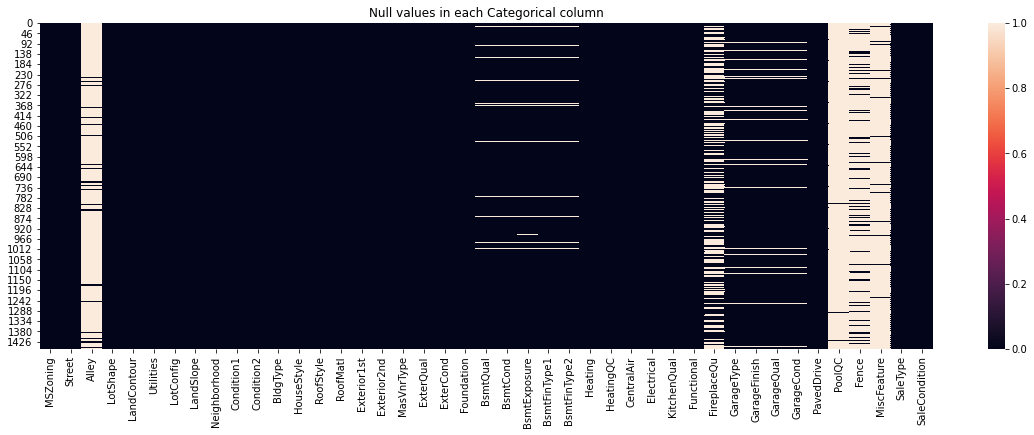

In [12]:
plt.figure(figsize=(20,6))
plt.title('Null values in each Categorical column')
sns.heatmap(df.select_dtypes('O').isnull())

In [13]:
# droping the feature if it contains more than 60% of missing values
features_less_60p_nan=['Alley','PoolQC','Fence','MiscFeature']
df.drop(columns=features_less_60p_nan,inplace=True)

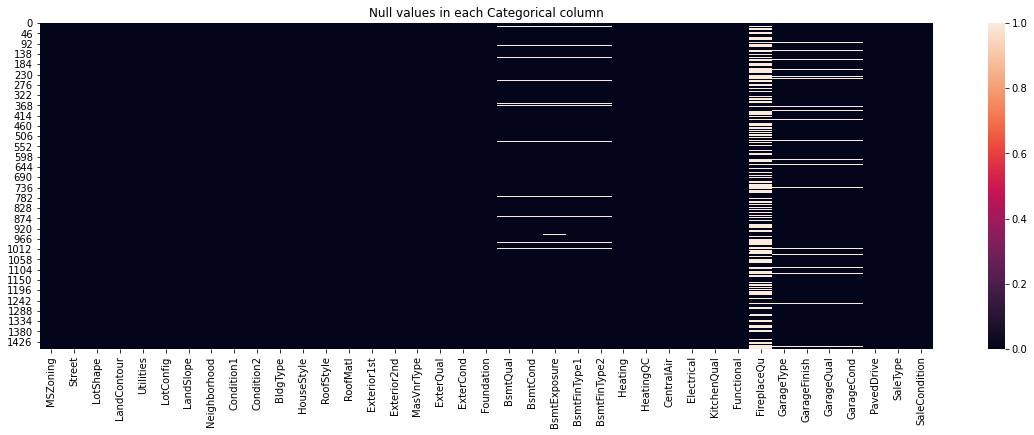

In [14]:
# after droping we still have alot of missing values

plt.figure(figsize=(20,6))
plt.title('Null values in each Categorical column')
sns.heatmap(df.select_dtypes('O').isnull())

### Handling missing values in categorical features



In [15]:
print(f"Categorical features with missing values {[col for col in df.select_dtypes('O').columns if df[col].isnull().sum()>0]}")

Categorical features with missing values ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


#### Unique categoreis in each missing values categorical feature

In [16]:
for col in [col for col in df.select_dtypes('O').columns if df[col].isnull().sum()>0]:
  print(f"Total Unique values in {col} are {len(df[col].unique())} and they are : {df[col].unique()}")

Total Unique values in MasVnrType are 5 and they are : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Total Unique values in BsmtQual are 5 and they are : ['Gd' 'TA' 'Ex' nan 'Fa']
Total Unique values in BsmtCond are 5 and they are : ['TA' 'Gd' nan 'Fa' 'Po']
Total Unique values in BsmtExposure are 5 and they are : ['No' 'Gd' 'Mn' 'Av' nan]
Total Unique values in BsmtFinType1 are 7 and they are : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Total Unique values in BsmtFinType2 are 7 and they are : ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Total Unique values in Electrical are 6 and they are : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
Total Unique values in FireplaceQu are 6 and they are : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Total Unique values in GarageType are 7 and they are : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Total Unique values in GarageFinish are 4 and they are : ['RFn' 'Unf' 'Fin' nan]
Total Unique values in GarageQual are 6 and they are : ['TA' 'Fa' 'Gd' nan 'Ex' '

In [17]:
# grouping features

basement_features=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
garage_features=['GarageType','GarageFinish','GarageQual','GarageCond']

In [18]:
# now filling the NAN values with NA means a new class which provides the information to model

df['BsmtQual'].fillna('NA',inplace=True) # there is no basement
df['BsmtCond'].fillna('NA',inplace=True)
df['BsmtExposure'].fillna('NA',inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)

df['GarageType'].fillna('NA',inplace=True) # there is no grage
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)

df['MasVnrType'].fillna('NA',inplace=True)
df['Electrical'].fillna('NA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)

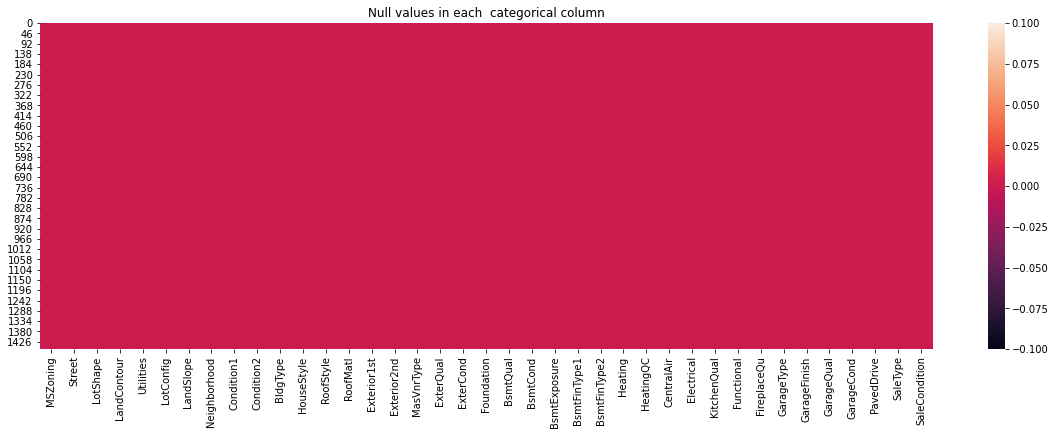

In [19]:
# now there is no NAN value in the categorical features

plt.figure(figsize=(20,6))
plt.title('Null values in each  categorical column')
sns.heatmap(df.select_dtypes('O').isnull())

### Labling the Categorical features

In [20]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [21]:
## Utilities columns doesn't provide any information so drop it

df.drop(columns=['Utilities'],inplace=True)

In [22]:
# unique values in the categorical columns

for col in df.select_dtypes('O'):
  print(f"{col} ===> {len(df[col].unique())}")

MSZoning ===> 5
Street ===> 2
LotShape ===> 4
LandContour ===> 4
LotConfig ===> 5
LandSlope ===> 3
Neighborhood ===> 25
Condition1 ===> 9
Condition2 ===> 8
BldgType ===> 5
HouseStyle ===> 8
RoofStyle ===> 6
RoofMatl ===> 8
Exterior1st ===> 15
Exterior2nd ===> 16
MasVnrType ===> 5
ExterQual ===> 4
ExterCond ===> 5
Foundation ===> 6
BsmtQual ===> 5
BsmtCond ===> 5
BsmtExposure ===> 5
BsmtFinType1 ===> 7
BsmtFinType2 ===> 7
Heating ===> 6
HeatingQC ===> 5
CentralAir ===> 2
Electrical ===> 6
KitchenQual ===> 4
Functional ===> 7
FireplaceQu ===> 6
GarageType ===> 7
GarageFinish ===> 4
GarageQual ===> 6
GarageCond ===> 6
PavedDrive ===> 3
SaleType ===> 9
SaleCondition ===> 6


In [23]:
df.shape

(1460, 76)

In [24]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes('O'):
  encoder=LabelEncoder()
  df[col]=encoder.fit_transform(df[col])

In [25]:
# After labeling 
print(f"After label encoding the categorical feature are : {len(df.select_dtypes('O').columns)} nad dataframe shape is {df.shape}")

After label encoding the categorical feature are : 0 nad dataframe shape is (1460, 76)


# Handling Numeric data

In [26]:
print(f"Numerical features are : {numeric_variables}")

Numerical features are : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


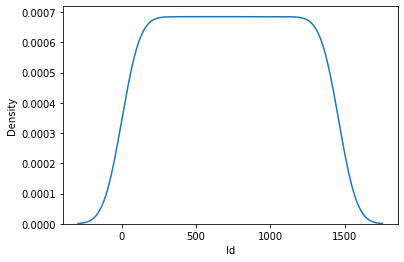

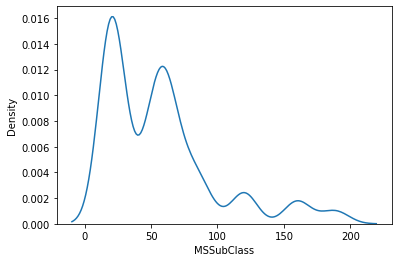

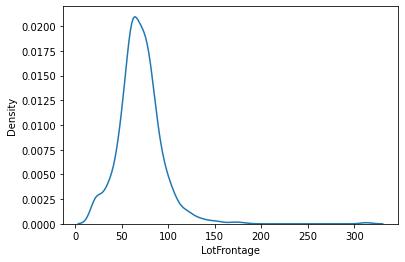

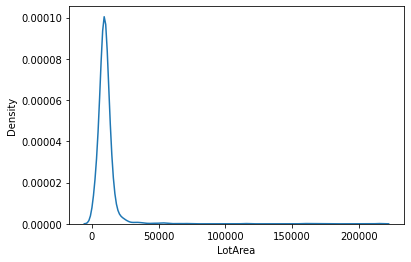

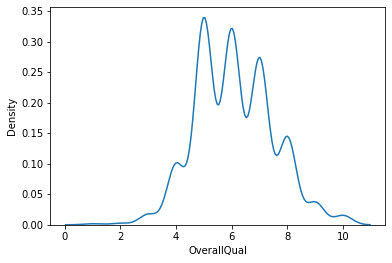

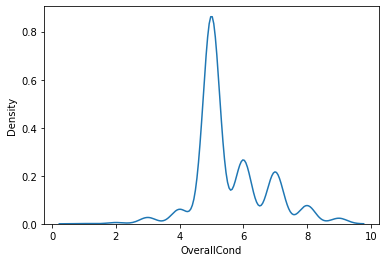

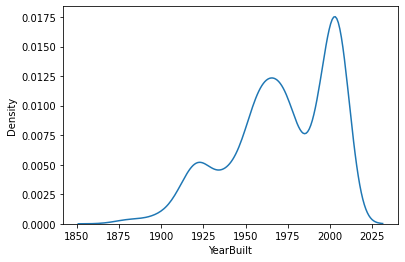

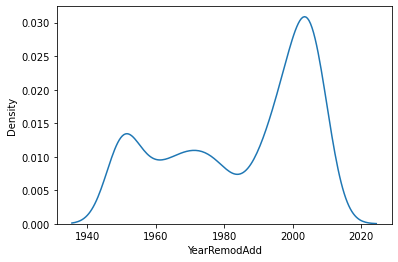

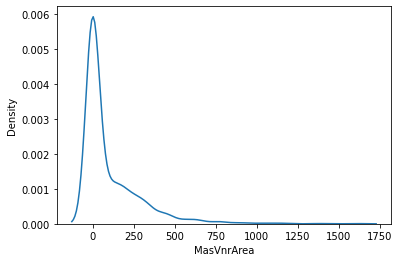

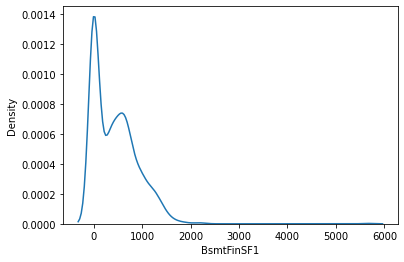

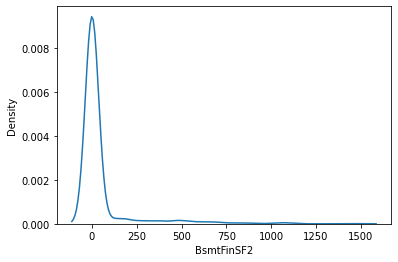

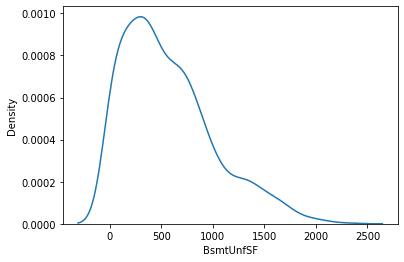

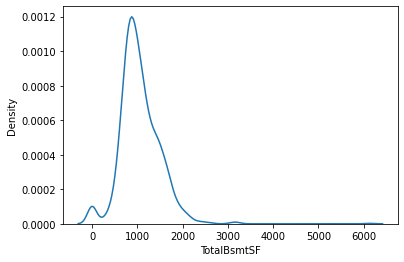

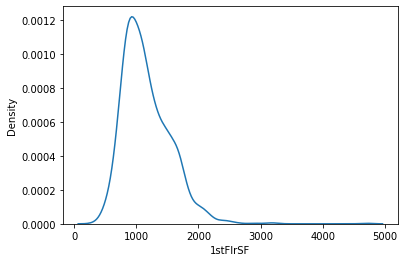

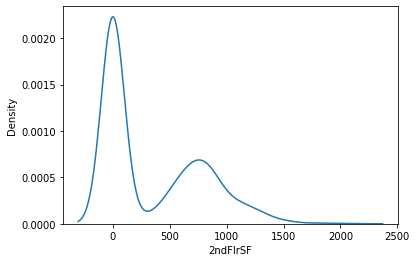

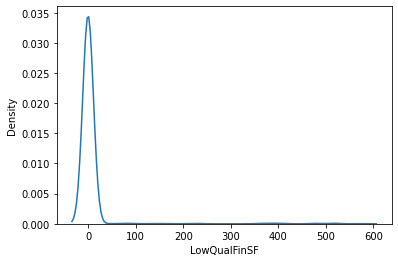

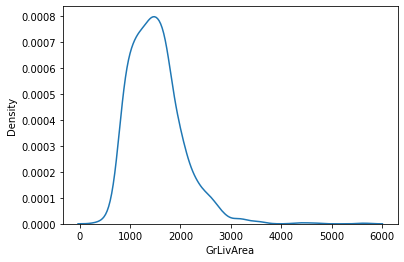

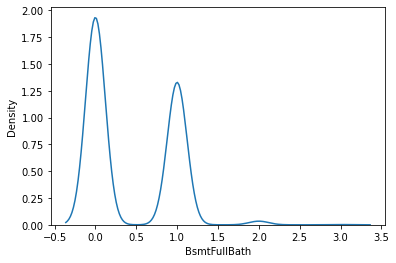

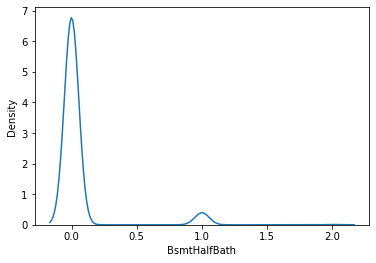

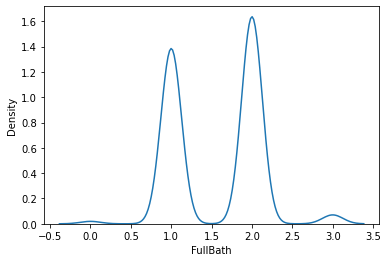

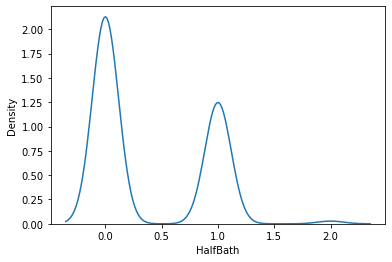

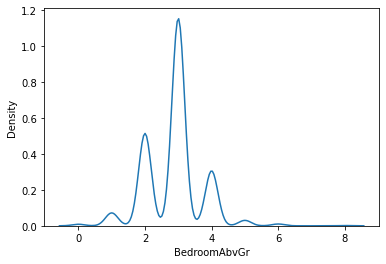

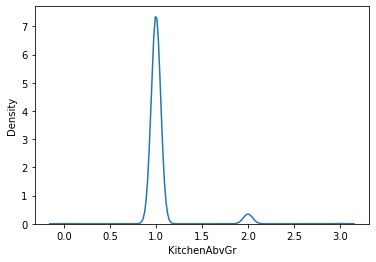

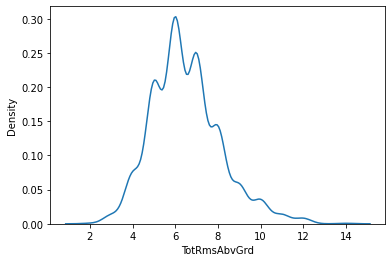

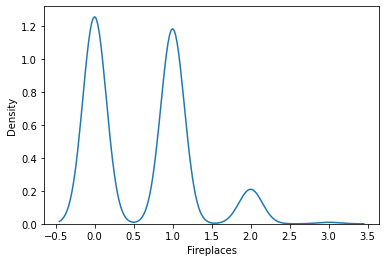

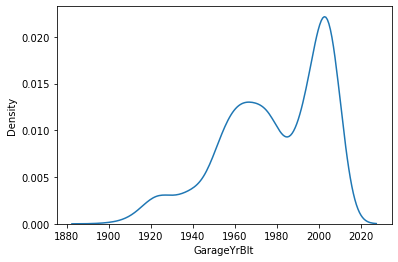

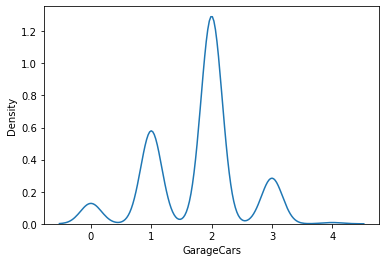

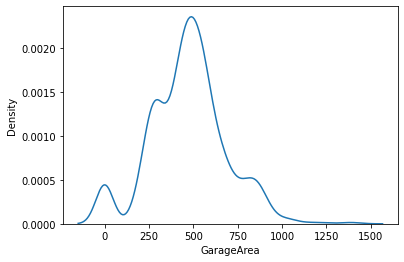

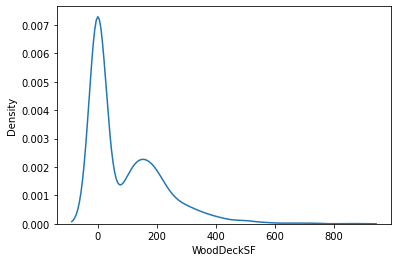

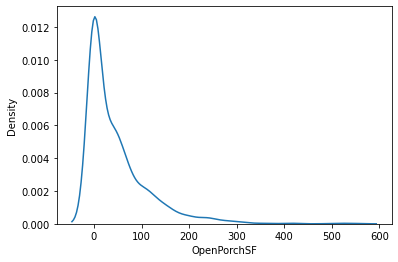

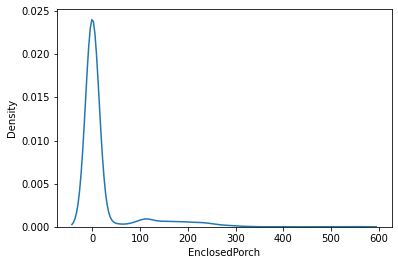

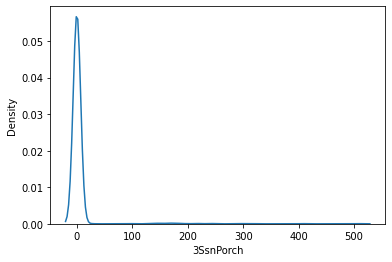

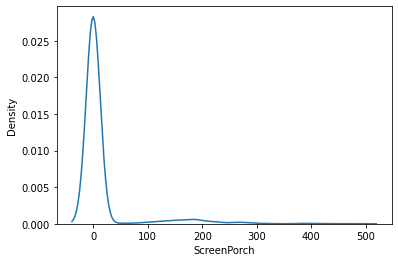

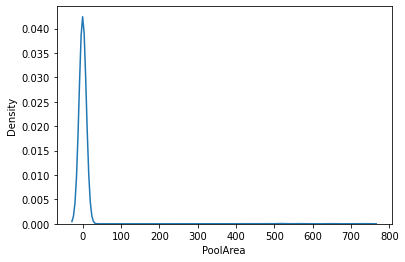

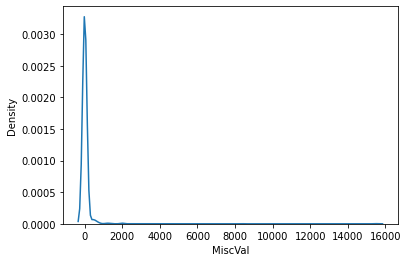

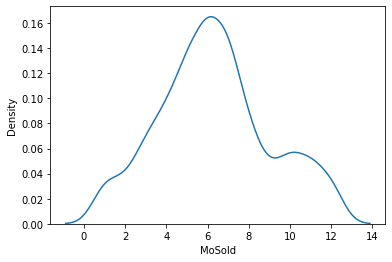

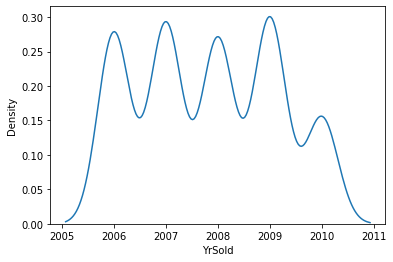

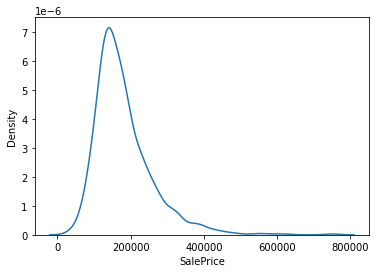

In [27]:
for feature in df[numeric_variables]:
  sns.kdeplot(df[feature])
  plt.show()

There are alot of outliers in the data so applying transformation


In [28]:
# applying logrithm to normalize the data
df[numeric_variables] = df[numeric_variables].apply(lambda x:np.log1p(x))

### Handle missing values

In [29]:
missing_numeric_features=[col for col in df[numeric_variables].columns if df[col].isnull().sum()>0]
missing_numeric_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [30]:
for feature in missing_numeric_features:
  print(f"{feature} contain {df[feature].isnull().sum()}")

LotFrontage contain 259
MasVnrArea contain 8
GarageYrBlt contain 81


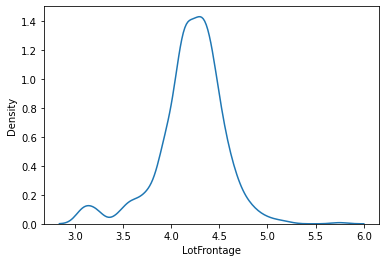

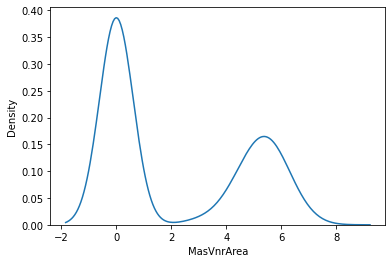

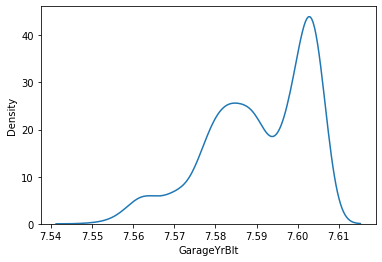

In [31]:
# cheking their distribution

for feature in missing_numeric_features:
  sns.kdeplot(df[feature])
  plt.show()

from distribution I think for lotfrontage mean is god choice 
and for other both median is good choice

In [32]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

## Feature scaling

In [33]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_cols=df.columns
df=pd.DataFrame(scaler.fit_transform(df),columns=df_cols)


In [34]:
#droping the id column
df.drop(columns=['Id'],inplace=True)

# Modeling different Regression techniques

In [35]:
# train test split

from sklearn.model_selection import train_test_split

X=df.drop(columns=['SalePrice'])
y=df["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
# imports of differnt models

from sklearn.linear_model import LinearRegression,ElasticNet,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [37]:
# models colleciton

base_models={
    'Linear Regression':LinearRegression(),
    'Elastic Net':ElasticNet(alpha=0.0005,l1_ratio=0.9),
    'Lasso':Lasso(alpha =0.0005,random_state=1),
    'SVR':SVR(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=300),
    'Ada Boost': AdaBoostRegressor(),
    'GB':GradientBoostingRegressor(
        learning_rate=0.005,
        n_estimators=300,
        max_depth=4,
        min_samples_leaf=15,
        min_samples_split=10,
    ),
    'XGB':XGBRegressor()
}

In [38]:
# import evualtion matris

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

models_data = {'R^2':{'training':{},'testing':{}},
               'Adjusted R^2':{'training':{},'testing':{}},
               'MAE':{'training':{},'testing':{}},
               'MSE':{'training':{},'testing':{}},
               'RMSE':{'training':{},'testing':{}}}

Making models and make predictions

In [39]:
train_len=X_train.shape[0]
test_len=X_test.shape[0]
k=X_train.shape[1]

for model in base_models:
  model = base_models[model].fit(X_train, y_train)

  y_pred_train = model.predict(X_train) # for training data
  y_pred_test = model.predict(X_test) # for testing data

  r2_train=model.score(X_train,y_train)
  r2_test=model.score(X_test,y_test)

  adjusted_r2_train= (1-(1-r2_train)*(train_len-1)/(train_len-k-1))
  adjusted_r2_test= (1-(1-r2_train)*(test_len-1)/(test_len-k-1))

  mae_train=mean_absolute_error(y_train, y_pred_train)
  mae_test=mean_absolute_error(y_test, y_pred_test)

  mse_train=mean_squared_error(y_train, y_pred_train)
  mse_test=mean_squared_error(y_test, y_pred_test)

  rmse_train=np.sqrt(mse_train)
  rmse_test=np.sqrt(mse_test)

  # adding them in dictionary
  models_data['R^2']['training'][type(model).__name__]=r2_train
  models_data['R^2']['testing'][type(model).__name__]=r2_test

  models_data['Adjusted R^2']['training'][type(model).__name__]=adjusted_r2_train
  models_data['Adjusted R^2']['testing'][type(model).__name__]=adjusted_r2_test

  models_data['MAE']['training'][type(model).__name__]=mae_train
  models_data['MAE']['testing'][type(model).__name__]=mae_test

  models_data['MSE']['training'][type(model).__name__]=mse_train
  models_data['MSE']['testing'][type(model).__name__]=mse_test

  models_data['RMSE']['training'][type(model).__name__]=rmse_train
  models_data['RMSE']['testing'][type(model).__name__]=rmse_test

[06:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
# making data frame of Resuls

r2 = pd.DataFrame(models_data['R^2']).sort_values(by='testing',ascending=False)
adj_r2 = pd.DataFrame(models_data['Adjusted R^2']).sort_values(by='testing',ascending=False)
mae = pd.DataFrame(models_data['MAE']).sort_values(by='testing',ascending=True)
mse = pd.DataFrame(models_data['MSE']).sort_values(by='testing',ascending=True)
rmse = pd.DataFrame(models_data['RMSE']).sort_values(by='testing',ascending=True)

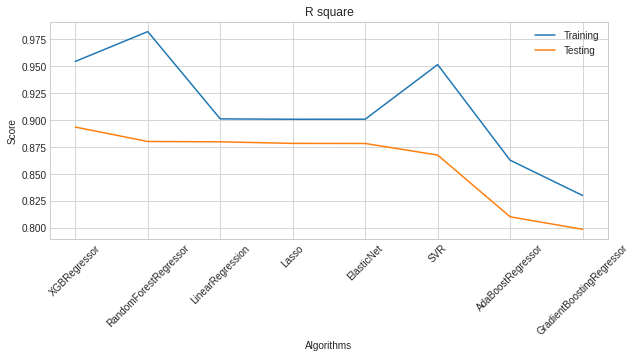

In [41]:
plt.style.use('seaborn-whitegrid')

plt.subplots(figsize=(10,4))
plt.plot(r2.index,r2['training'],label="Training")
plt.plot(r2.index,r2['testing'],label="Testing")
plt.title("R square")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

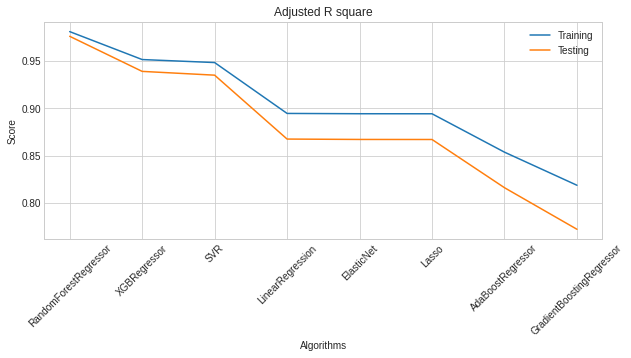

In [42]:
plt.subplots(figsize=(10,4))
plt.plot(adj_r2.index,adj_r2['training'],label="Training")
plt.plot(adj_r2.index,adj_r2['testing'],label="Testing")
plt.title("Adjusted R square")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

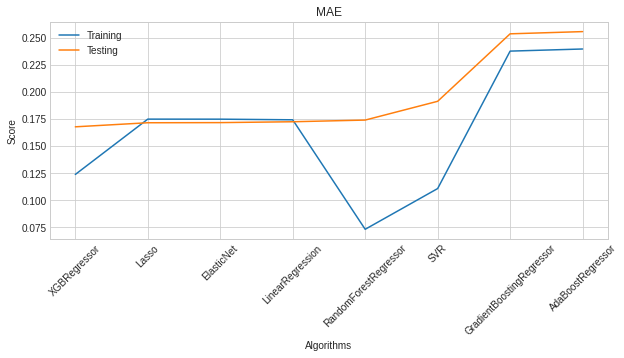

In [43]:
plt.subplots(figsize=(10,4))
plt.plot(mae.index,mae['training'],label="Training")
plt.plot(mae.index,mae['testing'],label="Testing")
plt.title("MAE")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

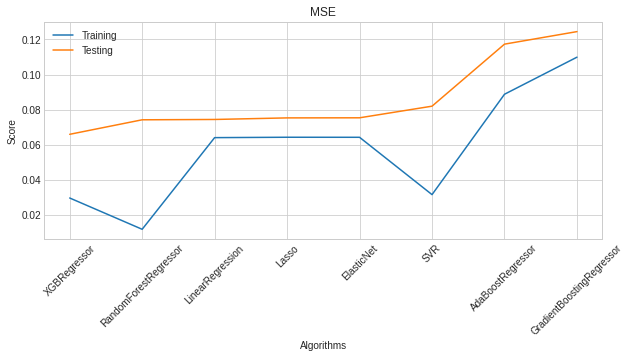

In [44]:
plt.subplots(figsize=(10,4))
plt.plot(mse.index,mse['training'],label="Training")
plt.plot(mse.index,mse['testing'],label="Testing")
plt.title("MSE")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

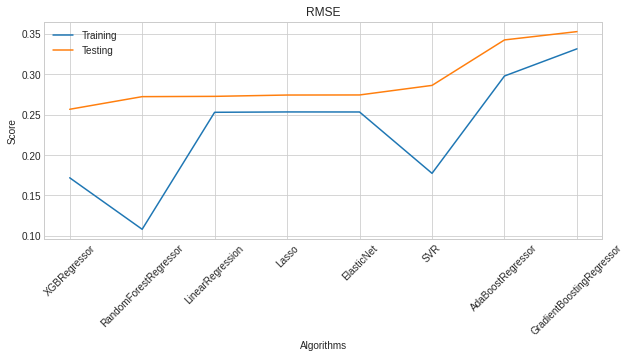

In [45]:
plt.subplots(figsize=(10,4))
plt.plot(rmse.index,rmse['training'],label="Training")
plt.plot(rmse.index,rmse['testing'],label="Testing")
plt.title("RMSE")
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

### Over all XGBRegressor performs well so we will continue with this

#### finding the best parameter using hyperparameter tuning

In [46]:
params={
    "n_estimators":[100,150,200,250,300,350,400],
    "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

model=XGBRegressor()

search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=2)
search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.7s finished


[06:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                      

In [48]:
search.best_params_

{'colsample_bytree': 0.4,
 'eta': 0.3,
 'gamma': 0.3,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 250}

In [49]:
# making a model using these parameters

model=XGBRegressor(
    max_depth=3,
    eta=0.3,
    min_child_weight=5,
    colsample_bytree=0.4,
    gamma=0.3,
    n_estimators=250
)

model.fit(X_train,y_train)


[06:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.3, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
from sklearn.metrics import mean_squared_log_error

score=model.score(X_test,y_test)
mse=mean_squared_error(y_test,model.predict(X_test))
msle=mean_squared_log_error(abs(y_test),abs(model.predict(X_test)))


print(f"R2 Score : {score}")
print(f"Mean square error : {mse}")
print(f"Mean square log error : {mean_squared_log_error(abs(y_test),abs(model.predict(X_test)))}")

R2 Score : 0.9074905649318246
Mean square error : 0.057245378992019064
Mean square log error : 0.016752672536589765
